📈 Classification Summary:


,precision,recall,f1-score,support
0,0.999227,0.999845,0.999536,6468.000000
1,0.875000,0.583333,0.700000,12.000000
accuracy,0.999074,0.999074,0.999074,0.999074
macro avg,0.937114,0.791589,0.849768,6480.000000
weighted avg,0.998997,0.999074,0.998982,6480.000000


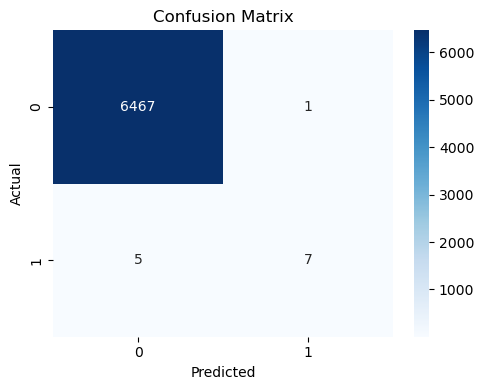

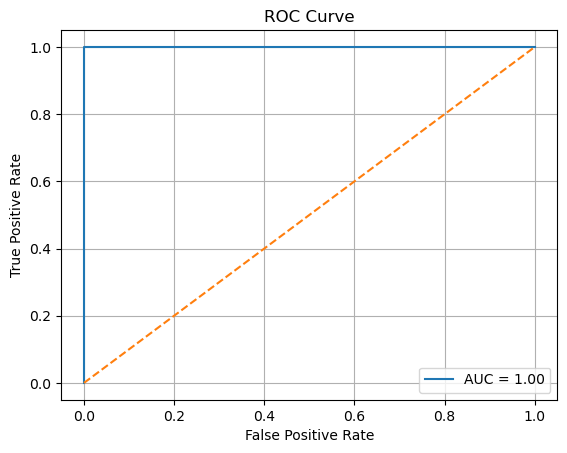


📉 Regression Summary:
Root Mean Squared Error (RMSE): 264.53
Mean Absolute Error (MAE): 228.56


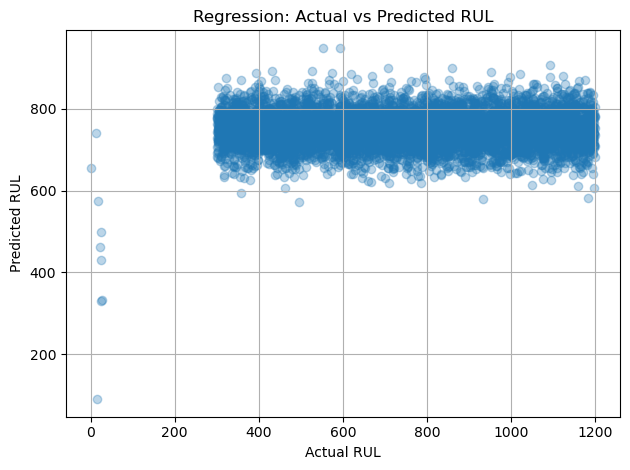

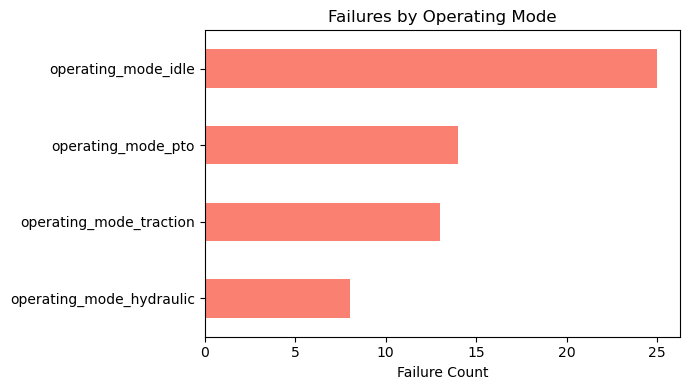

In [1]:
# 04_reporting.ipynb
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error

# Simulate reloaded outputs (optional: load from saved .pkl or logs)
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Reload features
DATA_PATH = Path("../data/processed/agri_features.csv")
df = pd.read_csv(DATA_PATH)

X = df.drop(columns=['failure_label', 'remaining_minutes', 'machine_id'])
y_cls = df['failure_label']
y_reg = df['remaining_minutes']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, stratify=y_cls, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train again for report
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
y_proba_cls = clf.predict_proba(X_test_cls)[:, 1]

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

# ==== Classification Metrics ====
report = classification_report(y_test_cls, y_pred_cls, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("📈 Classification Summary:")
display(df_report)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_cls, y_proba_cls)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_cls, y_proba_cls):.2f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

# ==== Regression Summary ====
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

print(f"\n📉 Regression Summary:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Actual vs Predicted RUL
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Regression: Actual vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()

# Failure distribution by operating mode
plt.figure(figsize=(7,4))
df_failure = df[df['failure_label'] == 1]
mode_cols = [col for col in df.columns if col.startswith("operating_mode_")]
mode_totals = df_failure[mode_cols].sum().sort_values()

mode_totals.plot(kind='barh', color='salmon')
plt.title("Failures by Operating Mode")
plt.xlabel("Failure Count")
plt.tight_layout()
plt.show()
